# 데이터 연결하기

In [1]:
# # 먼저 데이터가 저장된 폴더를 연결합시다.
# !mkdir -p aiffel/time_series_basic 
# # !ln -s data/* aiffel/time_series_basic
# !cp data/AirPassengers.csv aiffel/time_series_basic/

In [2]:
# ARCH 라이브러리 설치하기
!pip install arch==6.3.0

# ARIMA 실습
앞에서도 자주 만났던 AirPassengers 데이터셋을 SARIMA를 통해 예측해봅시다.

1. 시계열 데이터 분석을 위한 라이브러리를 불러옵니다.
2. AirPassengers 데이터셋을 불러옵니다.
3. AirPassengers 데이터셋의 Month column을 제외합니다.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # acf plot 및 pacf plot을 그리기 위한 라이브러리
from statsmodels.tsa.arima_model import ARIMA # ARIMA 모델
import pmdarima as pm # Auto ARIMA 모델

In [ ]:
ap = pd.read_csv(r'C:\Users\nini\Desktop\TimeSeriese_Learning_training\training\data\AirPassengers.csv')
ap.drop('Month', axis = 1, inplace = True)

# 데이터 확인하기
AirPassengers 데이터셋에서 Month가 제대로 제외되었는지 확인합니다.

In [5]:
ap

,#Passengers
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


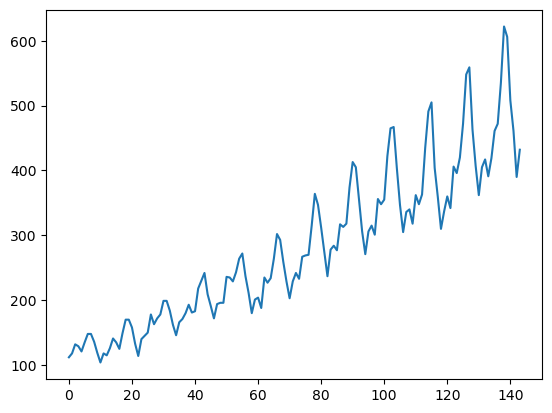

In [6]:
# ap 데이터 시각화 해보기
plt.plot(ap)
plt.show()

# 분산을 일정하게 만들기 - log transformation
1. 로그변환(Log Transformation)을 통해 분산을 일정하게 조절합니다.
2. 분산이 일정하게 적용되었는지 시각화한 후 확인합니다.

In [7]:
# np.log를 통해서 log transformation
ap_transformed = np.log(ap)

In [8]:
ap_transformed

,#Passengers
0,4.718499
1,4.770685
2,4.882802
3,4.859812
4,4.795791
...,...
139,6.406880
140,6.230481
141,6.133398
142,5.966147


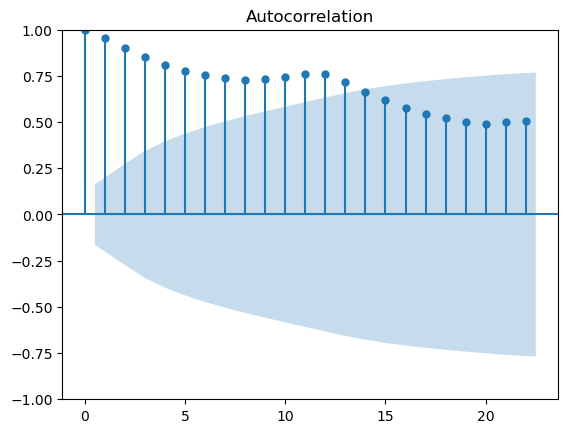

In [9]:
plot_acf(ap_transformed) # acf plot, 점차 감소하는 모양새를 지니고 있음
plt.plot();

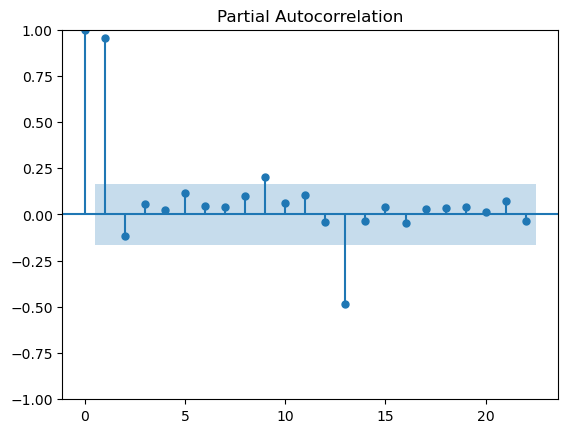

In [10]:
plot_pacf(ap_transformed) # pacf plot, lag 2까지 유의미한 결과를 보임
plt.plot();

**증가하는 추세가 있는 데이터 이기 때문에 위와 같은 형태를 띄고있다.**

#  차분을 통해 분석하기
ACF, PACF Plot과 차분을 활용하여 분석합니다.

In [11]:
# 차분 적용하기.
ap_diff = ap_transformed.diff()
ap_diff = ap_diff.dropna()

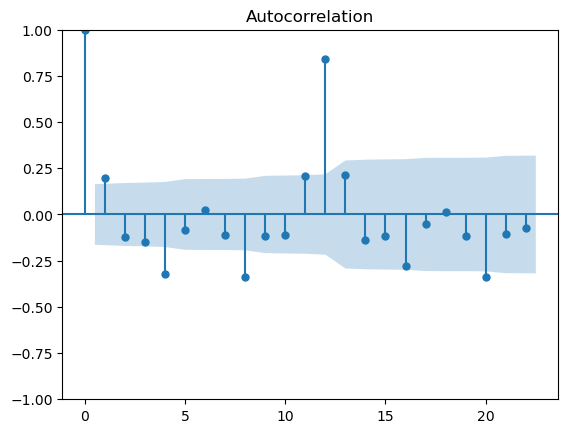

In [12]:
# lag 1과 lag 12에서 유의미한 lag가 포착됨
plot_acf(ap_diff)
plt.plot();

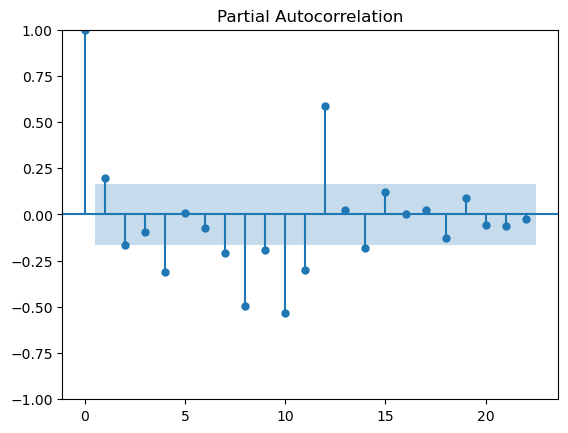

In [13]:
# lag 1, lag 8~12쯤에서 유의미한 lag가 포착됨
plot_pacf(ap_diff)
plt.plot();

acf와 pacf에서 n = 12 즈음에서 유의미한 상관관계가 나타납니다. 이는 **계절성 성분**으로 추측됩니다.    
auto-arima를 적합할 때 계절성을 고려하도록 해야함.    
ARIMA를 적용할 때에 계절성 요인도 고려해야 합니다.    

In [14]:
ap_transformed

,#Passengers
0,4.718499
1,4.770685
2,4.882802
3,4.859812
4,4.795791
...,...
139,6.406880
140,6.230481
141,6.133398
142,5.966147


향후 test에 활용할 부분을 분리합니다.

In [15]:
# 데이터 분리하기.
train_size = int(len(ap_transformed)*0.8)

ap_transformed_train = ap_transformed[:train_size]
ap_transformed_test = ap_transformed[train_size:]

# Auto ARIMA 적용 및 결과 확인
**AutoARIMA 내부 인자의 의미를 알아봅시다.**
* seasonal : False인 경우 non-seasonal model로 제한합니다.
* suppress_warnings : ARIMA를 실행하면 생기는 에러문구를 나오지 않도록 해줍니다.
* trace : True일 때 오류(error)가 발생하면 일부 내용을 출력합니다.
* max_D : seasonal의 최대 값을 설정할 수 있습니다.

In [16]:
# AutoARIMA
# seasonal = True, max_D(계절차분) = 12
model = pm.AutoARIMA(seasonal = True, suppress_warnings = True, trace = True, max_D = 12) 
res = model.fit(ap_transformed_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-212.317, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-189.733, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-191.035, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-192.641, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-189.957, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-216.228, Time=0.22 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-214.188, Time=0.24 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-219.173, Time=0.28 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-200.633, Time=0.15 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-218.778, Time=0.33 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-198.633, T

ARIMA(4,1,2) 모델이 적합한 것으로 확인 되었습니다.
모델의 수치는 변할 수 있습니다.

In [17]:
# confidence interval까지 도출
preds, conf_int = res.predict(n_periods=ap_transformed_test.shape[0], return_conf_int=True) 

# 아래의 코드 결과값을 서로 비교 분석해봅시다.
print(preds.shape) 
print(type(preds))
print('--'*40)
print(preds.shape[0])
print(type(preds.shape[0]))

(29,)
<class 'pandas.core.series.Series'>
--------------------------------------------------------------------------------
29
<class 'int'>


**preds (예측값)**
* 총 29개의 예측값이 시계열 형태로 출력되었습니다.

In [18]:
print('--'*40)
print(preds)
print('--'*40)
print(conf_int)

--------------------------------------------------------------------------------
115    6.212652
116    6.157029
117    6.096689
118    6.045213
119    6.033746
120    6.047892
121    6.081129
122    6.115542
123    6.143080
124    6.159814
125    6.167829
126    6.171624
127    6.175416
128    6.181970
129    6.191837
130    6.204214
131    6.217618
132    6.230780
133    6.242992
134    6.254174
135    6.264660
136    6.274914
137    6.285311
138    6.296026
139    6.307053
140    6.318269
141    6.329530
142    6.340728
143    6.351822
dtype: float64
--------------------------------------------------------------------------------
[[6.04711328 6.37818989]
 [5.91685276 6.3972061 ]
 [5.83565766 6.35772072]
 [5.77883273 6.31159287]
 [5.76653479 6.30095733]
 [5.77838132 6.31740333]
 [5.80859397 6.3536632 ]
 [5.84244458 6.38863974]
 [5.86997031 6.41618971]
 [5.88601164 6.43361596]
 [5.89284408 6.44281294]
 [5.89565469 6.44759381]
 [5.89892957 6.45190309]
 [5.90530322 6.45863759]
 [5.91511

**conf_int (신뢰 구간)**
* 각 예측값이 포함될 가능성이 높은 범위를 나타내며 예측의 신뢰도를 보여줍니다.

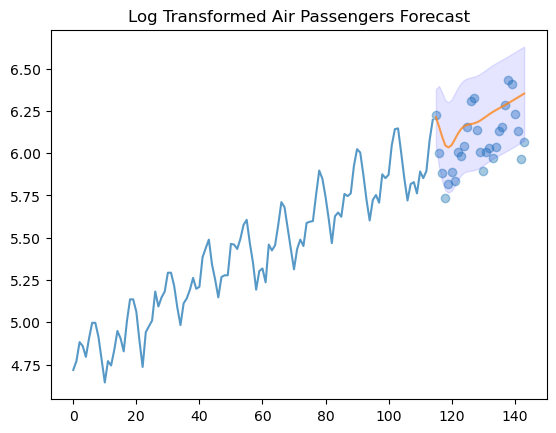

In [19]:
# 예측 성능을 시각화합니다. 
# 0. train과 test data를 축(axis)으로 만들었습니다.
# 1. x축은 test으로 만들어 놓은 train data를 사용하고, y축에 train data를 사용하여 train data를 시각화 합니다.
# 2. 1번 그래프에서 정답(AutoARIMA를 통해 만든 예측 값)에 해당하는 일자형 그래프가 생성됩니다.
# 3. 원래 가지고 있던 데이터셋의 y값(지도 학습의 정답)을 산점도(scatter plot)로 생성합니다.
# 4. 2, 3번의 분포에 해당하는 구간을 채워 그래프로 나타냈습니다.
x_axis = np.arange(ap_transformed_train.shape[0] + preds.shape[0]) # 115 + 29, plot을 그리기 위해 x축을 생성합니다. # 0
plt.plot(x_axis[:ap_transformed_train.shape[0]],ap_transformed_train, alpha=0.75) # 1
plt.plot(x_axis[ap_transformed_train.shape[0]:], preds, alpha=0.75) # 2
plt.scatter(x_axis[ap_transformed_train.shape[0]:],ap_transformed_test, 
            alpha=0.4, marker='o')  # 3 기존 test data는 scatter
plt.fill_between(x_axis[-preds.shape[0]:],
                 conf_int[:, 0], conf_int[:, 1],
                 alpha=0.1, color='b') # 4
plt.title("Log Transformed Air Passengers Forecast") # plot의 제목
plt.show() # 4개의 plot을 시각화 합니다.

* 위 이미지에서 주황색 선은 점추정을 한 선입니다.
* 추세를 잘 반영하고 있습니다.
* 구간추정 값도 95% 신뢰추정 구간 안쪽으로 대부분 위치한것을 확인할 수 있습니다.
* 결론 : ARIMA (4,1,2) 모델은 Log Transform 된 AirPassengers 데이터를 결론적으로 비교적 잘 예측하고 있다고 판단할 수 있습니다.

# ARCH 모델 실습해보기

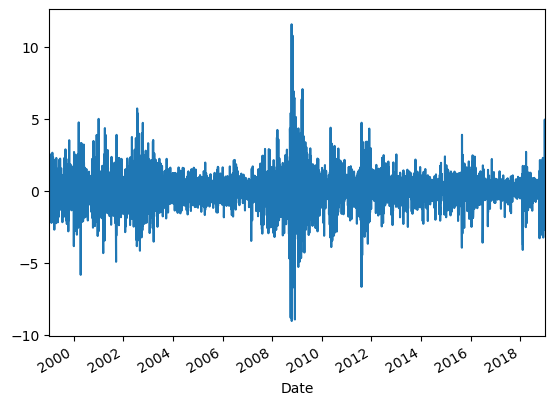

In [20]:
# ⑦-1 : 데이터 및 라이브러리 불러오기 
import datetime as dt # 날짜와 시간을 조작할 수 있는 Python 라이브러리 입니다 .
import arch.data.sp500 # S&P 500 데이터셋을 arch에서 불러옵니다.

# ⑦-2 : 필요한 데이터로 가공하고 시각화를 통해 확인하기
st = dt.datetime(2002, 1, 1) # start date
en = dt.datetime(2022, 1, 1) # end date
data = arch.data.sp500.load() # s&p 500 데이터 불러오기
market = data["Adj Close"] # 종가만 활용
returns = 100 * market.pct_change().dropna() # return값으로 변환
ax = returns.plot() # 수익률을 그래프로 만들기
xlim = ax.set_xlim(returns.index.min(), returns.index.max()) # xlim은 x축 값의 보기를 제한 합니다. 
plt.show()

강의에서 언급한 바와 같이, 조건부 이분산성(Conditional Heteroskedasticity)이 나타납니다.

In [21]:
# ⑦-3 : ARCH 모델 적용
from arch import arch_model

am = arch_model(returns) # return을 arch모델에 적합
res = am.fit(update_freq=5)

# ⑦-4 : 지표를 통한 결과 확인
print(res.summary())
# 다양한 결과가 제시되어있으나, 수업때 배웠던 p-value, AIC, BIC위주로 내용을 파악
# 아래에 있는 volatility model을 보면 alpha[1], Beta[1]은 GARCH(1,1)을 의미하며, p-value를 통해 신뢰도 95%에서 이들이 유의미함을 도출

Iteration:      5,   Func. Count:     35,   Neg. LLF: 6970.2779565773335
Iteration:     10,   Func. Count:     63,   Neg. LLF: 6936.718477482076
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6936.718476988951
            Iterations: 11
            Function evaluations: 68
            Gradient evaluations: 11
                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6936.72
Distribution:                  Normal   AIC:                           13881.4
Method:            Maximum Likelihood   BIC:                           13907.5
                                        No. Observations:                 5030
Date:                Mon, May 26 2025   Df Residuals:                     5029
Time:         

**summary() 해석**    
* AIC(Akaike Information Criterion) : 수치가 낮을수록 적합도가 높고 모델이 너무 복잡하면 패널티를 준다 과적합 방지 역할을 한다.
* BIC(Bayesian Information Criterion) : 수치가 낮을수록 적합도가 높고 샘플 수 𝑛에 따라 더 강하게 복잡한 모델에 패널티를 부여한다.
* Volatility Model 를 더 중심적으로 봐야한다.
* P>|t| : p밸류 값이다.

**결론 : GARCH모델에서 (1,1) 모델이 결론적으로 유의미하다.**

자동적으로 GARCH 모델에 적합되는 것을 확인할 수 있습니다.

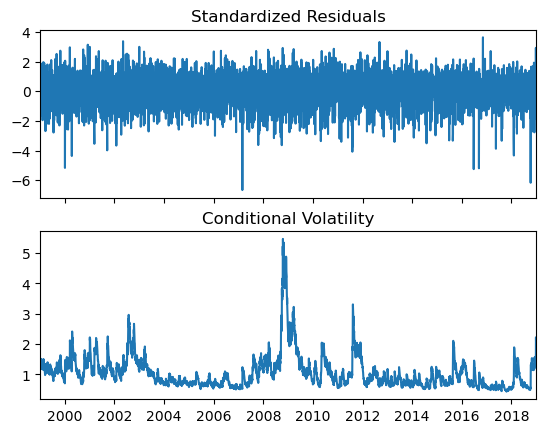

In [22]:
# ⑦-5 : 시각화를 통한 결과값 확인
res.plot()
plt.show()

모델 적합 후 남은 잔차(Residual)와 포착한 조건부 변동성(conditional volatility)을 시각적으로 확인할 수 있습니다.